## Read csv file and save it as data frame

In [139]:
import pandas as pd
import numpy as np

df = pd.read_csv('AdmissionPredict.csv')
df.head()
df2 = df

## Check NaN fields

In [140]:
df.isnull().sum()

Serial No.            0
GRE Score            22
TOEFL Score          20
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit      16
dtype: int64

## Exclude Chance of Admit NaN cells

In [141]:
df = df[df['Chance of Admit'].notna()]

## Method 1 filling NaN values

In [142]:
df['GRE Score'].fillna(int(df['GRE Score'].mean()), inplace=True)
df['TOEFL Score'].fillna(int(df['TOEFL Score'].mean()), inplace=True)
df['CGPA'].fillna(df['CGPA'].mean(), inplace=True)

/home/adib/.local/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


## Method 2 filling NaN values

In [143]:
df2['GRE Score'].fillna(int(df2['GRE Score'].median()), inplace=True)
df2['TOEFL Score'].fillna(int(df2['TOEFL Score'].median()), inplace=True)
df2['CGPA'].fillna(df2['CGPA'].median(), inplace=True)

Mean is good when the values are close to each other

Median is good when the values aren't close to each other

## Correlation of columns

In [144]:
df.corr().style.background_gradient(cmap='coolwarm')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.101412,-0.149120,-0.162320,-0.150616,-0.078713,-0.057292,-0.067161,0.047057
GRE Score,-0.101412,1.000000,0.807123,0.658515,0.604036,0.539428,0.788450,0.572515,0.784770
TOEFL Score,-0.149120,0.807123,1.000000,0.675345,0.631699,0.543653,0.800425,0.496663,0.758711
University Rating,-0.162320,0.658515,0.675345,1.000000,0.735077,0.652685,0.734636,0.437787,0.707191
SOP,-0.150616,0.604036,0.631699,0.735077,1.000000,0.731139,0.703744,0.442234,0.680752
LOR,-0.078713,0.539428,0.543653,0.652685,0.731139,1.000000,0.659490,0.389778,0.663452
CGPA,-0.057292,0.788450,0.800425,0.734636,0.703744,0.659490,1.000000,0.512595,0.855648
Research,-0.067161,0.572515,0.496663,0.437787,0.442234,0.389778,0.512595,1.000000,0.548443
Chance of Admit,0.047057,0.784770,0.758711,0.707191,0.680752,0.663452,0.855648,0.548443,1.000000


## Plot features according to their chance of admit

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit'>

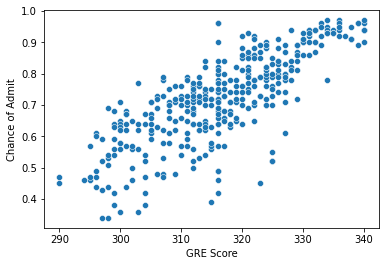

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='GRE Score', y='Chance of Admit')

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit'>

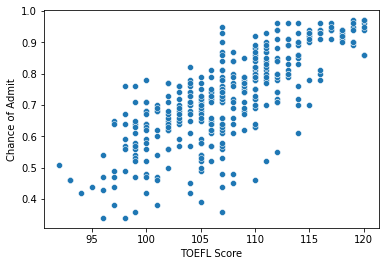

In [170]:
sns.scatterplot(data=df, x='TOEFL Score', y='Chance of Admit')

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit'>

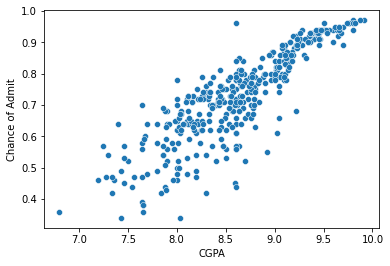

In [171]:
sns.scatterplot(data=df, x='CGPA', y='Chance of Admit')

<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit'>

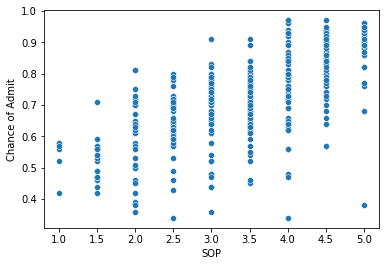

In [172]:
sns.scatterplot(data=df, x='SOP', y='Chance of Admit')

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

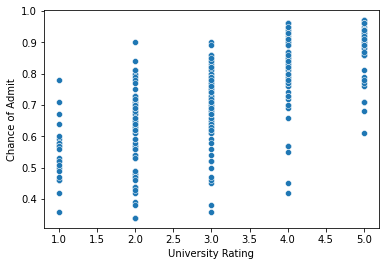

In [173]:
sns.scatterplot(data=df, x='University Rating', y='Chance of Admit')

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit'>

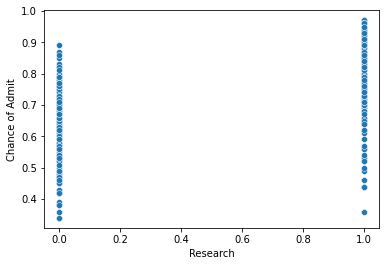

In [174]:
sns.scatterplot(data=df, x='Research', y='Chance of Admit')

## Split data frame into test and train

In [175]:
from sklearn.model_selection import train_test_split

X = df.drop(['Serial No.', 'Chance of Admit'], axis=1).values
Y = df['Chance of Admit'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(307, 7) (77, 7) (307,) (77,)


## Regression

In [176]:
from numpy.linalg import inv 

X_train_trans = np.transpose(X_train)
theta = np.matmul(np.matmul(inv(np.matmul(X_train_trans, X_train)), X_train_trans), Y_train)
theta 

array([-0.00242767,  0.0019773 ,  0.02191988,  0.00227658,  0.01817202,
        0.12929138,  0.05977553])

## Model accuracy

In [177]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

def predict(theta, data):
    predictions = []
    for row in data:
        predictions.append(np.inner(row, theta))

    return predictions

predictions = predict(theta, X_test)

[0.6757611934094978,
 0.6885714134601413,
 0.7169775745743657,
 0.630507222561579,
 0.8344762319531588,
 0.6731172528977055,
 0.8400686033321069,
 0.8942696170462545,
 0.8906510088838631,
 0.6963421629923674,
 0.8706758542017218,
 0.6696871051193635,
 0.565279008396705,
 0.9144587950342,
 0.637604061002999,
 0.5161257393464296,
 0.8764595285699821,
 0.7736965196201733,
 0.7226545799692734,
 0.6488516644587685,
 0.8334504387737405,
 0.6921224705036245,
 0.9009346618854418,
 0.8291911024286448,
 0.5821016693081241,
 0.7358926641188597,
 0.895246785315545,
 0.6172587136744148,
 0.945321512493869,
 0.8263230487605661,
 0.7537438265907761,
 0.7076432672883011,
 0.6088434084996814,
 1.0054593741336793,
 0.9336194401872178,
 0.8799331767720913,
 0.6872143165020401,
 0.5346688658158105,
 0.788941103877147,
 0.7130692100102727,
 0.8923831650296803,
 0.6347475347843801,
 0.6103332061702548,
 0.863743280627508,
 0.9017469690108468,
 0.705377748289455,
 0.8068126978046319,
 0.810741911482086,
 0.5

In [178]:
mean_absolute_error(Y_test, predictions)

0.055125495630047656

In [179]:
np.sqrt(mean_squared_error(Y_test, predictions))

0.073062729025493

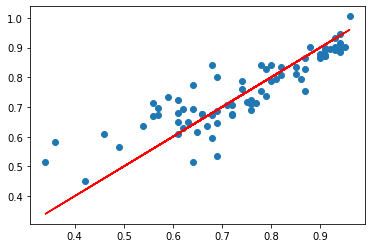

In [181]:
plt.scatter(Y_test, predictions)

plt.plot(Y_test, Y_test, 'r')

## Using sklearn Linear Regression 

In [188]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, Y_train)

Y_pred = reg.predict(X_test)
Y_pred.size




77

In [189]:
MSE_test = np.sqrt(mean_squared_error(Y_test, Y_pred))
print('The MSE for test is: ',MSE_test)

The MSE for test is:  0.06386799702046252


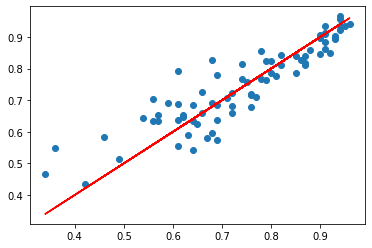

In [190]:
plt.scatter(Y_test, Y_pred)

plt.plot(Y_test, Y_test, 'r')

## Again with 3 features

In [196]:
X = df.drop(['Serial No.', 'Chance of Admit', 'LOR ', 'SOP', 'Research', 'University Rating'], axis=1).values
Y = df['Chance of Admit'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(307, 3) (77, 3) (307,) (77,)


In [197]:
reg = LinearRegression().fit(X_train, Y_train)

Y_pred = reg.predict(X_test)
Y_pred.size

77

In [198]:
MSE_test = np.sqrt(mean_squared_error(Y_test, Y_pred))
print('The MSE for test is: ',MSE_test)

The MSE for test is:  0.07010766985331138


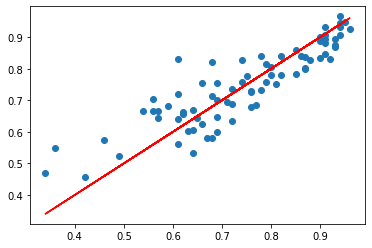

In [199]:
plt.scatter(Y_test, Y_pred)

plt.plot(Y_test, Y_test, 'r')